In [46]:
# Import necessary libraries
import numpy as np
from PIL import ImageEnhance, Image
import matplotlib.pyplot as plt
from skimage import io
import cv2

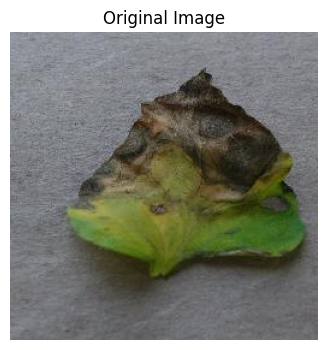

In [47]:
# Load an image for pre-processing
image_path = r'c:\Users\ADMIN\Desktop\Plant Disease Detection\test\TomatoEarlyBlight2.JPG'
image = io.imread(image_path)

# Display the image
plt.figure(figsize=(4, 4))  # Set the figure size
plt.imshow(image)  # Display the image
plt.axis('off')  # Hide the axis
plt.title("Original Image")  # Set the title for the plot
plt.show()  # Show the plot

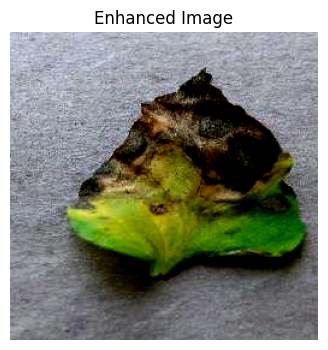

In [48]:
# 1. Image Enhancement
enhancer = ImageEnhance.Contrast(Image.fromarray(image))
enhanced_image = enhancer.enhance(2.0)
enhanced_image = np.array(enhanced_image)

# Display the image
plt.figure(figsize=(4, 4))  # Set the figure size
plt.imshow(enhanced_image)  # Display the image
plt.axis('off')  # Hide the axis
plt.title("Enhanced Image")  # Set the title for the plot
plt.show()  # Show the plot


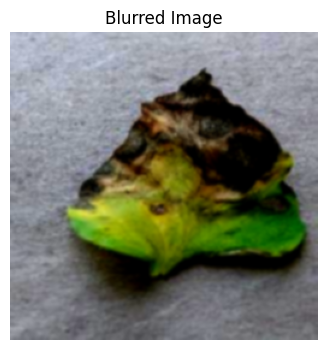

In [49]:
# 2. Noise Reduction using Gaussian Blur
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# Display the image
plt.figure(figsize=(4, 4))  # Set the figure size
plt.imshow(blurred_image)  # Display the image
plt.axis('off')  # Hide the axis
plt.title("Blurred Image")  # Set the title for the plot
plt.show()  # Show the plot

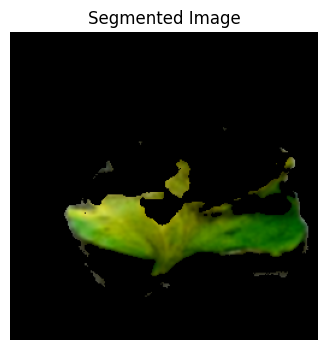

In [50]:
# 3. Image Segmentation using Color Thresholding
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)
lower_green = np.array([25, 40, 40])
upper_green = np.array([90, 255, 255])
mask = cv2.inRange(hsv_image, lower_green, upper_green)
segmented_image = cv2.bitwise_and(blurred_image, blurred_image, mask=mask)

# Display the image
plt.figure(figsize=(4, 4))  # Set the figure size
plt.imshow(segmented_image)  # Display the image
plt.axis('off')  # Hide the axis
plt.title("Segmented Image")  # Set the title for the plot
plt.show()  # Show the plot

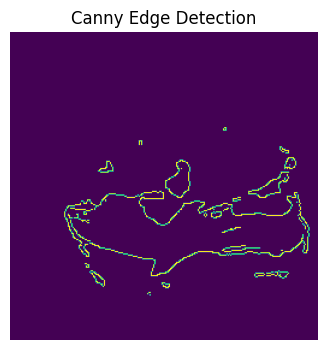

In [51]:
# 4. Edge Detection using Canny
edges = cv2.Canny(segmented_image, 100, 200)

# Display the image
plt.figure(figsize=(4, 4))  # Set the figure size
plt.imshow(edges)  # Display the image
plt.axis('off')  # Hide the axis
plt.title("Canny Edge Detection")  # Set the title for the plot
plt.show()  # Show the plot

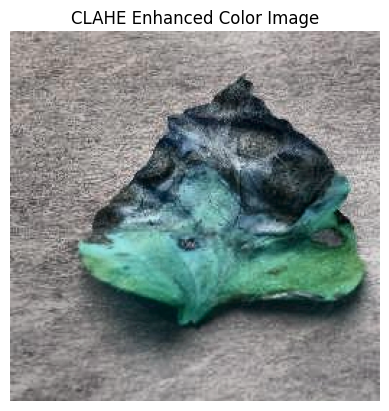

In [52]:
#5. CLAHE (Contrast Limited Adaptive Histogram Equalization)

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab) # Convert the image to Lab color space

l_channel, a_channel, b_channel = cv2.split(lab_image) # Split the Lab image into L, a, and b channels

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)) # Create a CLAHE object

clahe_l = clahe.apply(l_channel) # Apply CLAHE to the L channel

clahe_lab_image = cv2.merge((clahe_l, a_channel, b_channel)) # Merge the CLAHE-enhanced L channel with the original a and b channels

clahe_color_image = cv2.cvtColor(clahe_lab_image, cv2.COLOR_Lab2BGR) # Convert back to BGR color space for display

# Display the CLAHE color image
plt.imshow(cv2.cvtColor(clahe_color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Hide axes
plt.title("CLAHE Enhanced Color Image")
plt.show()  # Show the plot

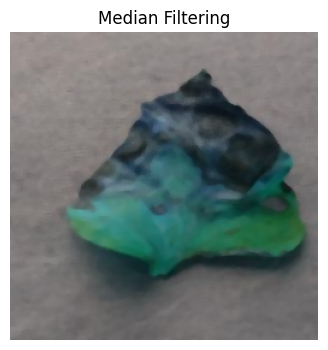

In [53]:
#6. Apply Median Filtering
median_filtered_image = cv2.medianBlur(image, 5)

# Display the Median Filtered Image
plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("Median Filtering")
plt.axis('off')  # Hide axes
plt.show()

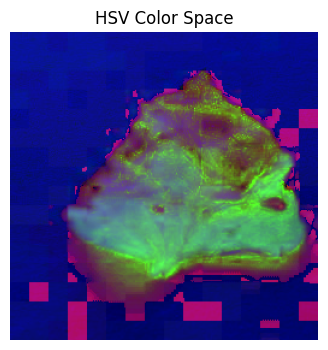

In [54]:
#7. Convert to HSV Color Space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the HSV Image
plt.figure(figsize=(4, 4))
plt.imshow(hsv_image)
plt.title("HSV Color Space")
plt.axis('off')  # Hide axes
plt.show()


Text(0, 0.5, 'Pixel Count')

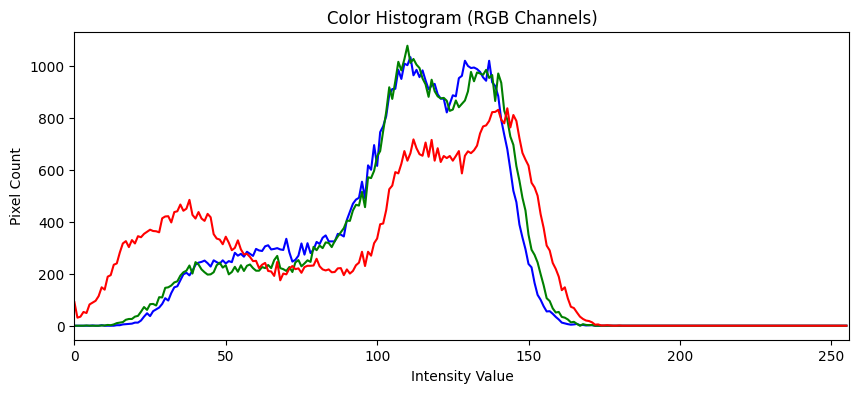

In [55]:
# 8. Color Histogram (RGB Channels)
# Calculate histogram for each color channel
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 4))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title("Color Histogram (RGB Channels)")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

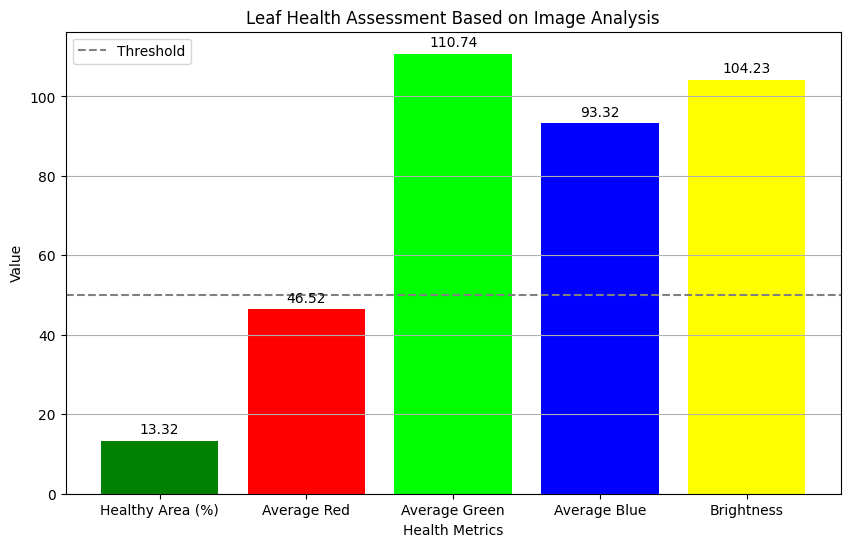

In [56]:
# Automatically calculate health metrics from the segmented image
def calculate_health_metrics(segmented_image, original_image):
    # Convert to grayscale for analysis
    gray_segmented = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

    # Calculate total area (number of pixels)
    total_area = gray_segmented.size

    # Calculate healthy area (sum of non-zero pixels)
    healthy_area = cv2.countNonZero(gray_segmented)

    # Proportion of healthy area
    healthy_ratio = healthy_area / total_area * 100

    # Calculate color metrics from the original image
    avg_color = cv2.mean(original_image, mask=gray_segmented)

    # Calculate brightness
    brightness = np.mean(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY))

    return healthy_ratio, avg_color, brightness

# Get health metrics
healthy_ratio, avg_color, brightness = calculate_health_metrics(segmented_image, image)

# Prepare data for graph
scores = {
    'Healthy Area (%)': healthy_ratio,
    'Average Red': avg_color[2],  # Red channel
    'Average Green': avg_color[1],  # Green channel
    'Average Blue': avg_color[0],  # Blue channel
    'Brightness': brightness,
}

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['green', 'red', 'lime', 'blue', 'yellow'])
plt.title('Leaf Health Assessment Based on Image Analysis')
plt.xlabel('Health Metrics')
plt.ylabel('Value')
plt.axhline(y=50, color='grey', linestyle='--', label='Threshold')
plt.legend()

# Annotate the bars with their scores
for i, (metric, score) in enumerate(scores.items()):
    plt.text(i, score + 1, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.show()
